# Cyber Threat Hunting - Chapter 9

# Scenario

## Training dataset

#### Listing 9.2 Jupyter notebook code — Load the data from the original training dataset

In [9]:
import pandas as pd

path_train = r"dtqbc-m-train.csv"
df_orig = pd.read_csv(path_train, usecols = \
    ['label','qname', 'qd_qtype'])
df_orig.rename(columns={'qname': 'fqdn',\
    'qd_qtype':'query_type', 'label':'class'}, inplace=True)

In [10]:
df_orig

,class,fqdn,query_type
0,2,tv66ShUMWEDcg64hME6+9lvc4sPOHS/9HXrtTHmIzMEKPa...,16
1,1,q+Z9iX2hCN0JA2hJIuIp9Bb/2wLoDfrfEv8LR5rSJjrPE0...,16
2,1,q+aDOYNRCB52vD7EdADs5iUQKCj0LwoTa5uezQMcdKxRDJ...,16
3,3,0yta0P��XAG2B2�n��zz4�7�Z�����o�J��8e�fu�7�o�g...,10
4,2,kzNHyLC/RydeypLK50E/36+P49TxXHE90KWkM+mmE7cDib...,16
...,...,...,...
19996,2,45Ar/qLwLA64Iu9togr3V0LDqeeSBUdLVdAPWqq7xhiATw...,5
19997,2,PsfIoHptQh0HJbI7PSStBnxyIoUx5xrdtgxZuOxd14cwH5...,16
19998,4,r43763.tunnel.tuns.org.,5
19999,1,q+aNi42jCMDVPbSPQtej99RiHkOiezYpVcsfplrVguvVjo...,16


## Analyzing the dataset

#### Listing 9.3 Jupyter notebook code — Drop duplicate rows in df_orig

In [14]:
# In case you wanted to print the duplicates before we drop them
# Sort the DataFrame by all columns to bring duplicates next to each other
df_sorted = df_orig.sort_values(by=df_orig.columns.tolist())

# Filter out the duplicates
duplicates = df_sorted[df_sorted.duplicated(keep=False)]

print(duplicates)

       class                                               fqdn  query_type
11525      1                         q+Z++38TBA.hidemyself.org.          16
13770      1                         q+Z++38TBA.hidemyself.org.          16
13715      1  q+Z+137vCKqKlonmeA7WUGsznkT4vkZtSDLL5eFC2a3B9v...          16
18898      1  q+Z+137vCKqKlonmeA7WUGsznkT4vkZtSDLL5eFC2a3B9v...          16
3723       1  q+Z+3373CEp8ZmqEPKY/DgW4+7oHuWos4YK6ZsBWiI5Xos...          16
...      ...                                                ...         ...
15568      4                            r49741.tunnel.tuns.org.           5
11761      4                            r50821.tunnel.tuns.org.           5
12522      4                            r50821.tunnel.tuns.org.           5
18298      4                            r50947.tunnel.tuns.org.           5
18649      4                            r50947.tunnel.tuns.org.           5

[3288 rows x 3 columns]


In [15]:
df_orig = df_orig.drop_duplicates()
df_orig = df_orig.reset_index(drop=True)

In [17]:
df_orig

,class,fqdn,query_type
0,2,tv66ShUMWEDcg64hME6+9lvc4sPOHS/9HXrtTHmIzMEKPa...,16
1,1,q+Z9iX2hCN0JA2hJIuIp9Bb/2wLoDfrfEv8LR5rSJjrPE0...,16
2,1,q+aDOYNRCB52vD7EdADs5iUQKCj0LwoTa5uezQMcdKxRDJ...,16
3,3,0yta0P��XAG2B2�n��zz4�7�Z�����o�J��8e�fu�7�o�g...,10
4,2,kzNHyLC/RydeypLK50E/36+P49TxXHE90KWkM+mmE7cDib...,16
...,...,...,...
18352,1,q+Z/MX9JCFUnemD2OTRZh/+msL2EIE2/uGAw8Jc+8DxJm8...,16
18353,2,45Ar/qLwLA64Iu9togr3V0LDqeeSBUdLVdAPWqq7xhiATw...,5
18354,2,PsfIoHptQh0HJbI7PSStBnxyIoUx5xrdtgxZuOxd14cwH5...,16
18355,4,r43763.tunnel.tuns.org.,5


#### Listing 9.4 Jupyter notebook code — Return the number of empty cells for every column in df_orig

In [18]:
df_orig.isnull().sum()

class         0
fqdn          0
query_type    0
dtype: int64

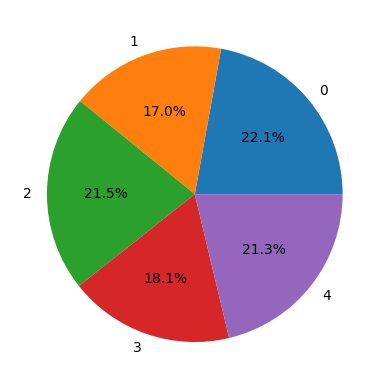

In [19]:
import matplotlib.pyplot as plt

class_counts = df_orig.groupby('class').size()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.show()

## Extracting features

#### Listing 9.6 Jupyter notebook code — Extracting features

In [20]:
df_orig['fqdn_length'] = df_orig['fqdn'].str.len()
df_orig['fqdn_count_numbers'] = df_orig['fqdn'].str.count('\d')
df_orig['fqdn_count_letters'] = df_orig['fqdn'].str.count('[a-zA-Z]')
df_orig['fqdn_count_special'] = df_orig['fqdn'].str.count('[^\d\w\s]')
df_orig['fqdn_count_lower'] = df_orig['fqdn'].str.count('[a-z]')
df_orig['fqdn_count_upper'] = df_orig['fqdn'].str.count('[A-Z]')
df_orig['fqdn_count_num_fqdn_labels'] = df_orig['fqdn'].str.count('\.')

#### Listing 9.7 Jupyter notebook code — Calculate the length of the first FQDN label

In [21]:
import re

def extract_labels(string):
    return re.findall("[^.]+", string)
def firstlength(string):
    return len(re.findall("[^.]+", string)[0])
df_orig['first_fqdn_label_length'] = \
    [firstlength(x) for x in df_orig['fqdn']]

#### Listing 9.8 Jupyter notebook code — Calculate the length of the maximum FQDN label

In [22]:
def maxlength(list):
    return len(max(list, key=len))

df_orig['extracted_fqdn_labels'] = [extract_labels(x) \
    for x in df_orig['fqdn']]
df_orig['max_fqdn_label_length'] = [maxlength(x) \
    for x in df_orig['extracted_fqdn_labels']]
df_orig = df_orig.drop(['extracted_fqdn_labels'], axis='columns')

#### Listing 9.9 Jupyter notebook code — Calculate the entropy of fqdn

In [23]:
import math
from collections import Counter

def entropy(s):
    counts = Counter(s)
    length = float(len(s))
    entropy_value = 0.0
    for count in counts.values():
        probability = count / length
        entropy_value -= probability * math.log(probability, 2)
    
    return entropy_value

df_orig['fqdn_entropy'] = df_orig['fqdn'].apply(entropy)

In [24]:
len('api.github.com')

14

In [25]:
entropy('api.github.com')

3.52164063634332

In [26]:
df_orig.head(10)

,class,fqdn,query_type,fqdn_length,fqdn_count_numbers,fqdn_count_letters,fqdn_count_special,fqdn_count_lower,fqdn_count_upper,fqdn_count_num_fqdn_labels,first_fqdn_label_length,max_fqdn_label_length,fqdn_entropy
0,2,tv66ShUMWEDcg64hME6+9lvc4sPOHS/9HXrtTHmIzMEKPa...,16,244,36,192,16,107,85,11,63,63,5.788881
1,1,q+Z9iX2hCN0JA2hJIuIp9Bb/2wLoDfrfEv8LR5rSJjrPE0...,16,194,35,151,8,80,71,5,63,63,5.810285
2,1,q+aDOYNRCB52vD7EdADs5iUQKCj0LwoTa5uezQMcdKxRDJ...,16,194,20,165,9,84,81,5,63,63,5.771027
3,3,0yta0P��XAG2B2�n��zz4�7�Z�����o�J��8e�fu�7�o�g...,10,253,18,112,122,62,50,7,62,62,4.031804
4,2,kzNHyLC/RydeypLK50E/36+P49TxXHE90KWkM+mmE7cDib...,16,245,34,192,19,103,89,11,63,63,5.784111
5,4,r49669.tunnel.tuns.org.,5,23,5,14,4,14,0,4,6,6,3.534219
6,4,r23494.tunnel.tuns.org.,5,23,5,14,4,14,0,4,6,6,3.621176
7,2,U9pVkTmG1OhMuT2dEtzTTgTOXN9z9JxB35D3TFvaz8tuiL...,16,245,39,191,15,109,82,11,63,63,5.802774
8,1,q+aCsILIBA.hidemyself.org.,16,26,0,22,4,16,6,3,10,10,4.286790
9,4,r39774.tunnel.tuns.org.,5,23,5,14,4,14,0,4,6,6,3.621176


## Analyzing the features

#### Listing 9.10 Jupyter notebook code — Select the features in df_orig

In [27]:
df_orig_selected = df_orig[['class', 'query_type',\
    'fqdn_length', 'fqdn_count_numbers',\
        'fqdn_count_letters', 'fqdn_count_special',\
            'fqdn_count_lower', 'fqdn_count_upper',\
                'fqdn_count_num_fqdn_labels', 'fqdn_entropy',\
                    'first_fqdn_label_length','max_fqdn_label_length']]

df_orig_selected.shape

(18357, 12)

#### Listing 9.11 Jupyter notebook code — Visualize the pairwise correlations between features

<Axes: >

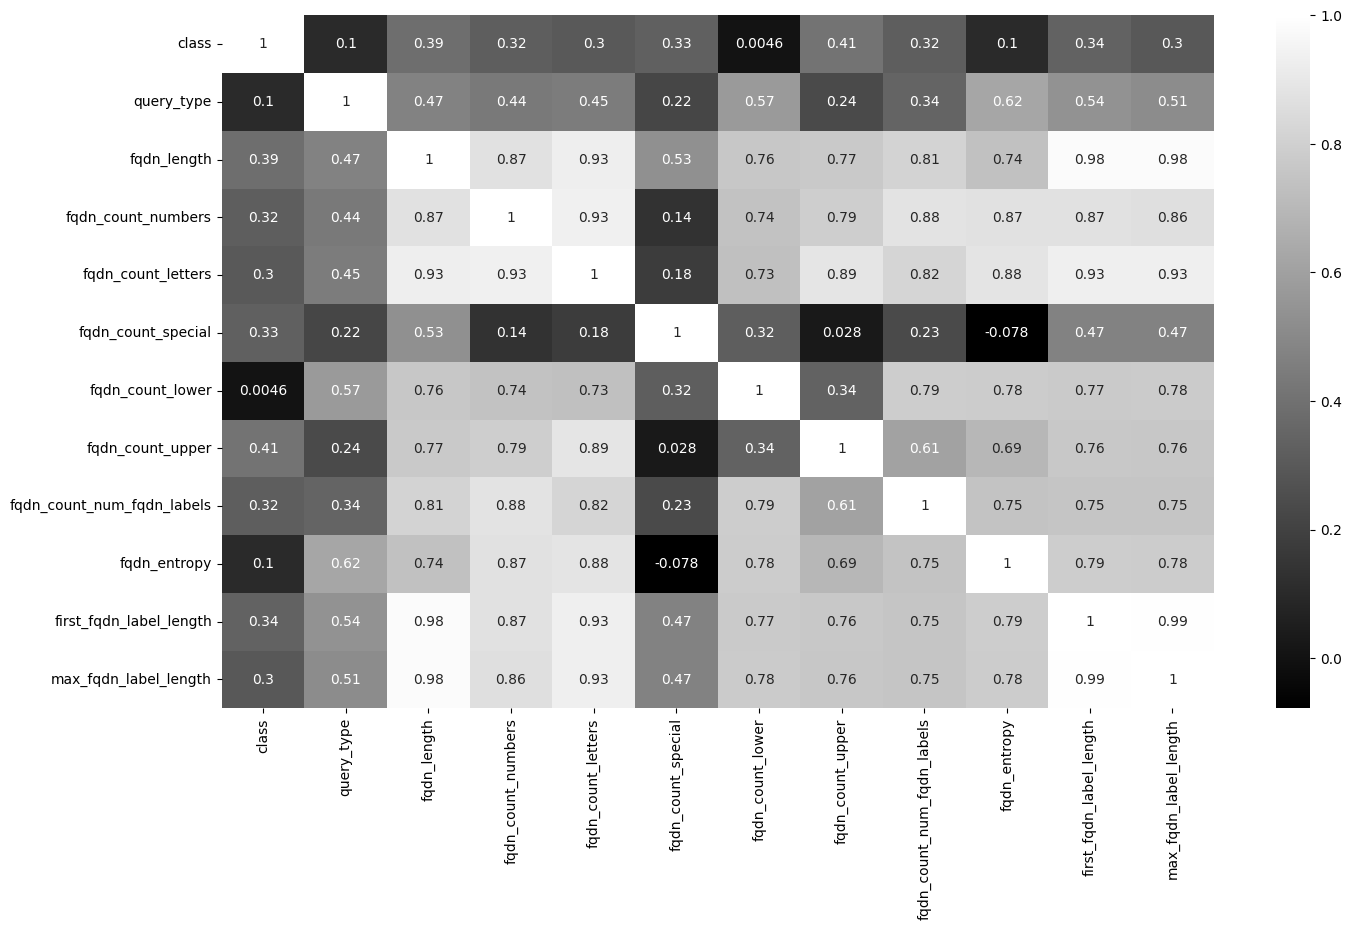

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,9))
sns.heatmap(df_orig_selected.corr(method='pearson'), annot=True, cmap='gray')


## Features reduction

#### Listing 9.12 Jupyter notebook code — Split df_orig_selected into df_orig_selected_train and df_orig_selected_test

In [29]:
from sklearn.model_selection import train_test_split

X = df_orig_selected.drop('class', axis=1)
y = df_orig_selected['class']
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

#### Listing 9.13 Jupyter notebook code — Check the shape of the training dataset, X_train

In [30]:
X_train.shape

(14685, 11)

#### Listing 9.14 Jupyter notebook code — Generate a pie chart for the class distribution in X_train

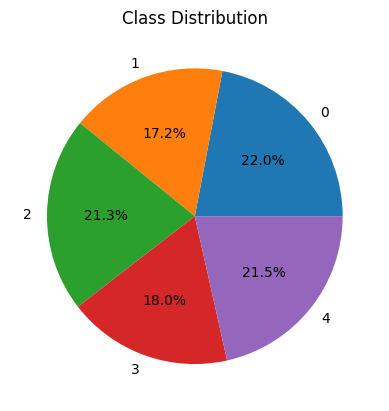

In [31]:
X_train_copy = X_train.copy()
X_train_copy['class'] = y_train.values

class_counts = X_train_copy.groupby('class').size()

plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

#### Listing 9.15 Generate a pie chart for the class distribution in X_test

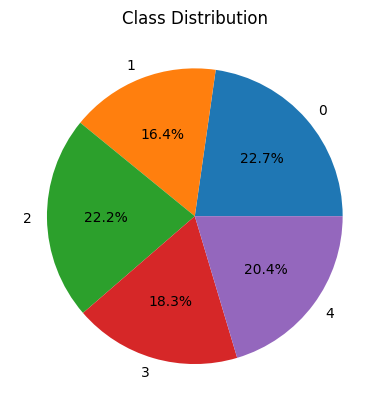

In [32]:
X_test_copy = X_test.copy()
X_test_copy['class'] = y_test.values
class_counts = X_test_copy.groupby('class').size()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

#### Listing 9.16 Jupyter notebook code — Scale the features in X_train

In [33]:
from sklearn.preprocessing import StandardScaler

#Scale the training set feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

,query_type,fqdn_length,fqdn_count_numbers,fqdn_count_letters,fqdn_count_special,fqdn_count_lower,fqdn_count_upper,fqdn_count_num_fqdn_labels,fqdn_entropy,first_fqdn_label_length,max_fqdn_label_length
0,-1.252260,-1.127754,-1.129351,-1.032688,-0.564747,-0.799379,-0.889782,-1.040091,-1.002396,-1.265427,-0.928237
1,0.325585,1.028420,0.179983,0.309957,2.023944,0.447947,0.127682,0.345250,-0.190823,0.845125,0.843184
2,-1.252260,-1.156125,-1.129351,-1.072178,-0.564747,-0.880726,-0.889782,-0.693756,-1.108372,-1.193883,-1.229756
3,1.377482,0.962221,1.364617,1.178727,-0.238019,1.451231,0.654582,1.730592,1.352042,0.880897,0.880874
4,1.377482,0.479919,0.554078,0.704852,-0.288285,0.746220,0.472892,-0.347420,1.378014,0.880897,0.880874
...,...,...,...,...,...,...,...,...,...,...,...
14680,1.377482,0.962221,1.364617,1.191890,-0.263152,1.559694,0.600075,1.730592,1.320973,0.880897,0.880874
14681,-1.252260,-1.127754,-1.129351,-1.019525,-0.589880,-0.772263,-0.889782,-1.040091,-1.109628,-1.229655,-0.965927
14682,-1.252260,-1.071013,-1.129351,-0.940546,-0.589880,-0.609569,-0.889782,-1.040091,-0.523117,-1.265427,-0.702098
14683,1.377482,0.479919,0.865824,0.639036,-0.288285,0.637757,0.454723,-0.347420,1.379956,0.880897,0.880874


#### Listing 9.17 Jupyter notebook code — Plot the PCA cumulative sum of the explained variance

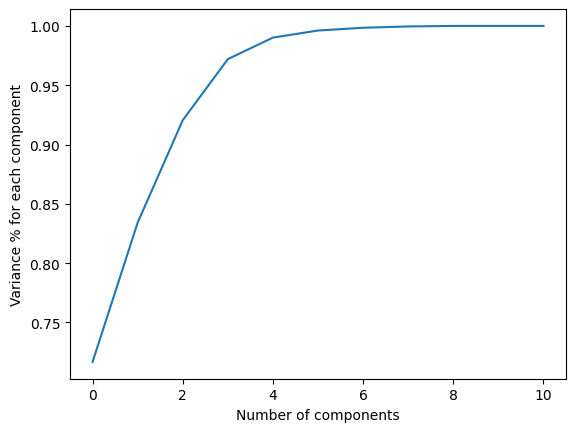

In [34]:
# Deterine the number of Principle Components

from sklearn.decomposition import PCA
import numpy as np

#fitting the pca algorithm with our data
pca=PCA().fit(X_train_scaled)      
#plotting the cumulative summation of the explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance % for each component')
#plt.title('Explained variance')
plt.show()


#### Listing 9.18 Jupyter notebook code — Apply PCA to X_train_scaled

In [35]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)

In [36]:
print(pd.DataFrame(X_train_pca, columns=['PC1', 'PC2', 'PC3', 'PC4']))

            PC1       PC2       PC3       PC4
0      3.316405 -0.222155 -0.347967 -0.333677
1     -1.621158  2.052092 -0.545943  0.170106
2      3.370213 -0.250137 -0.387346 -0.515230
3     -3.618564 -0.539409  1.039047 -0.513343
4     -2.124023 -0.367948  1.161952  0.936708
...         ...       ...       ...       ...
14680 -3.627216 -0.520639  1.094063 -0.587773
14681  3.341135 -0.208918 -0.365088 -0.346860
14682  2.983434 -0.334982 -0.181290 -0.384849
14683 -2.169293 -0.423598  1.121481  0.933020
14684 -2.151243 -0.472904  1.185491  0.928947

[14685 rows x 4 columns]


#### Listing 9.19 Jupyter notebook code — Generate a plot showing PC1 and PC2 based on class

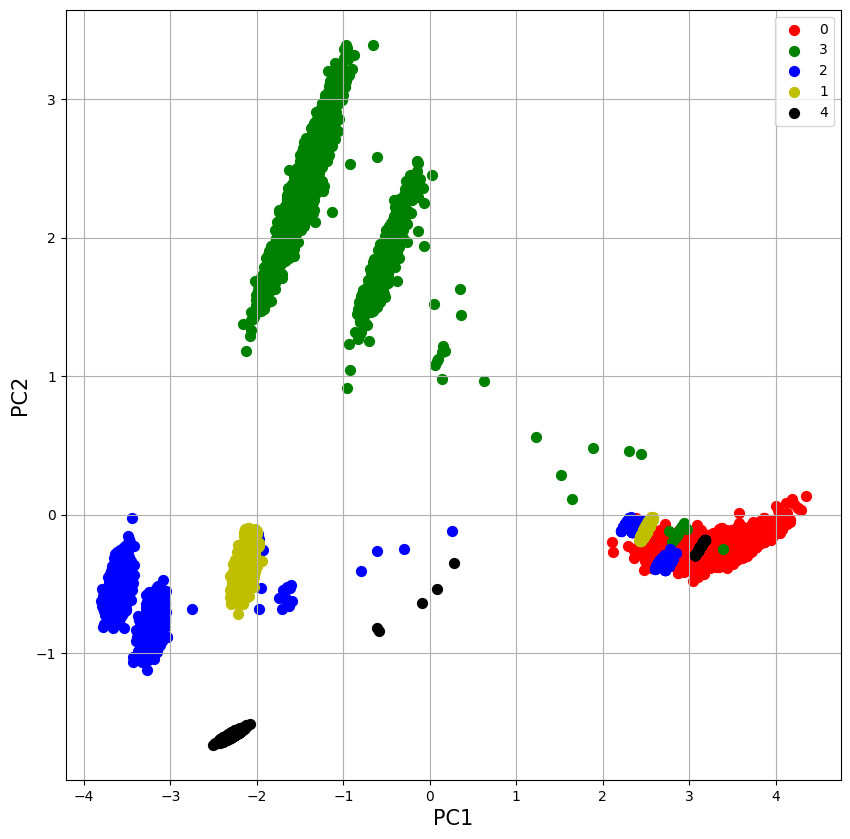

In [37]:
X_train_pca_copy = pd.DataFrame(X_train_pca, \
    columns=['PC1', 'PC2', 'PC3', 'PC4'])
X_train_pca_copy['class'] = y_train.values

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)

targets = X_train_pca_copy['class'].unique()
colors = ['r', 'g', 'b', 'y', 'k']  # one color per class
for target, color in zip(targets,colors):
    indicesToKeep = X_train_pca_copy['class'] == target
    ax.scatter(X_train_pca_copy.loc[indicesToKeep, 'PC1']
               , X_train_pca_copy.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

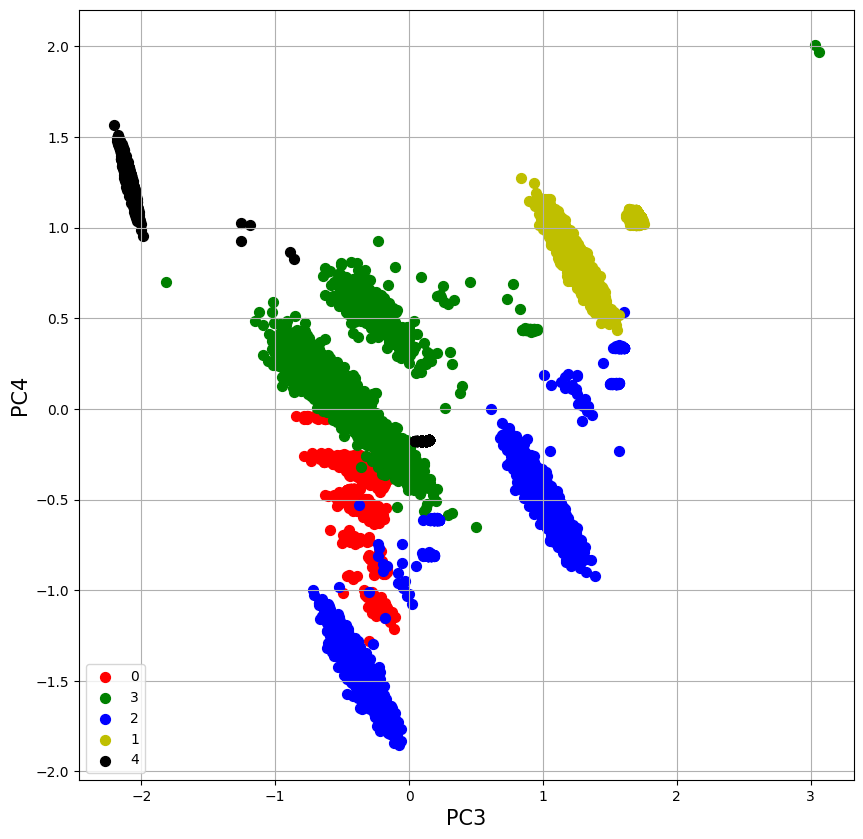

In [38]:
X_train_pca_copy = pd.DataFrame(X_train_pca, \
    columns=['PC1', 'PC2', 'PC3', 'PC4'])
X_train_pca_copy['class'] = y_train.values


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC3', fontsize = 15)
ax.set_ylabel('PC4', fontsize = 15)

targets = X_train_pca_copy['class'].unique()
colors = ['r', 'g', 'b', 'y', 'k']  # one color per class
for target, color in zip(targets,colors):
    indicesToKeep = X_train_pca_copy['class'] == target
    ax.scatter(X_train_pca_copy.loc[indicesToKeep, 'PC3']
               , X_train_pca_copy.loc[indicesToKeep, 'PC4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

## Random Forest

#### Listing 9.20 Jupyter notebook code — Create and train a Random Forest Classifier model on X_train_pca

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

#### Listing 9.21 Jupyter notebook code — Visualize a single decision tree in the Random Forest model rf

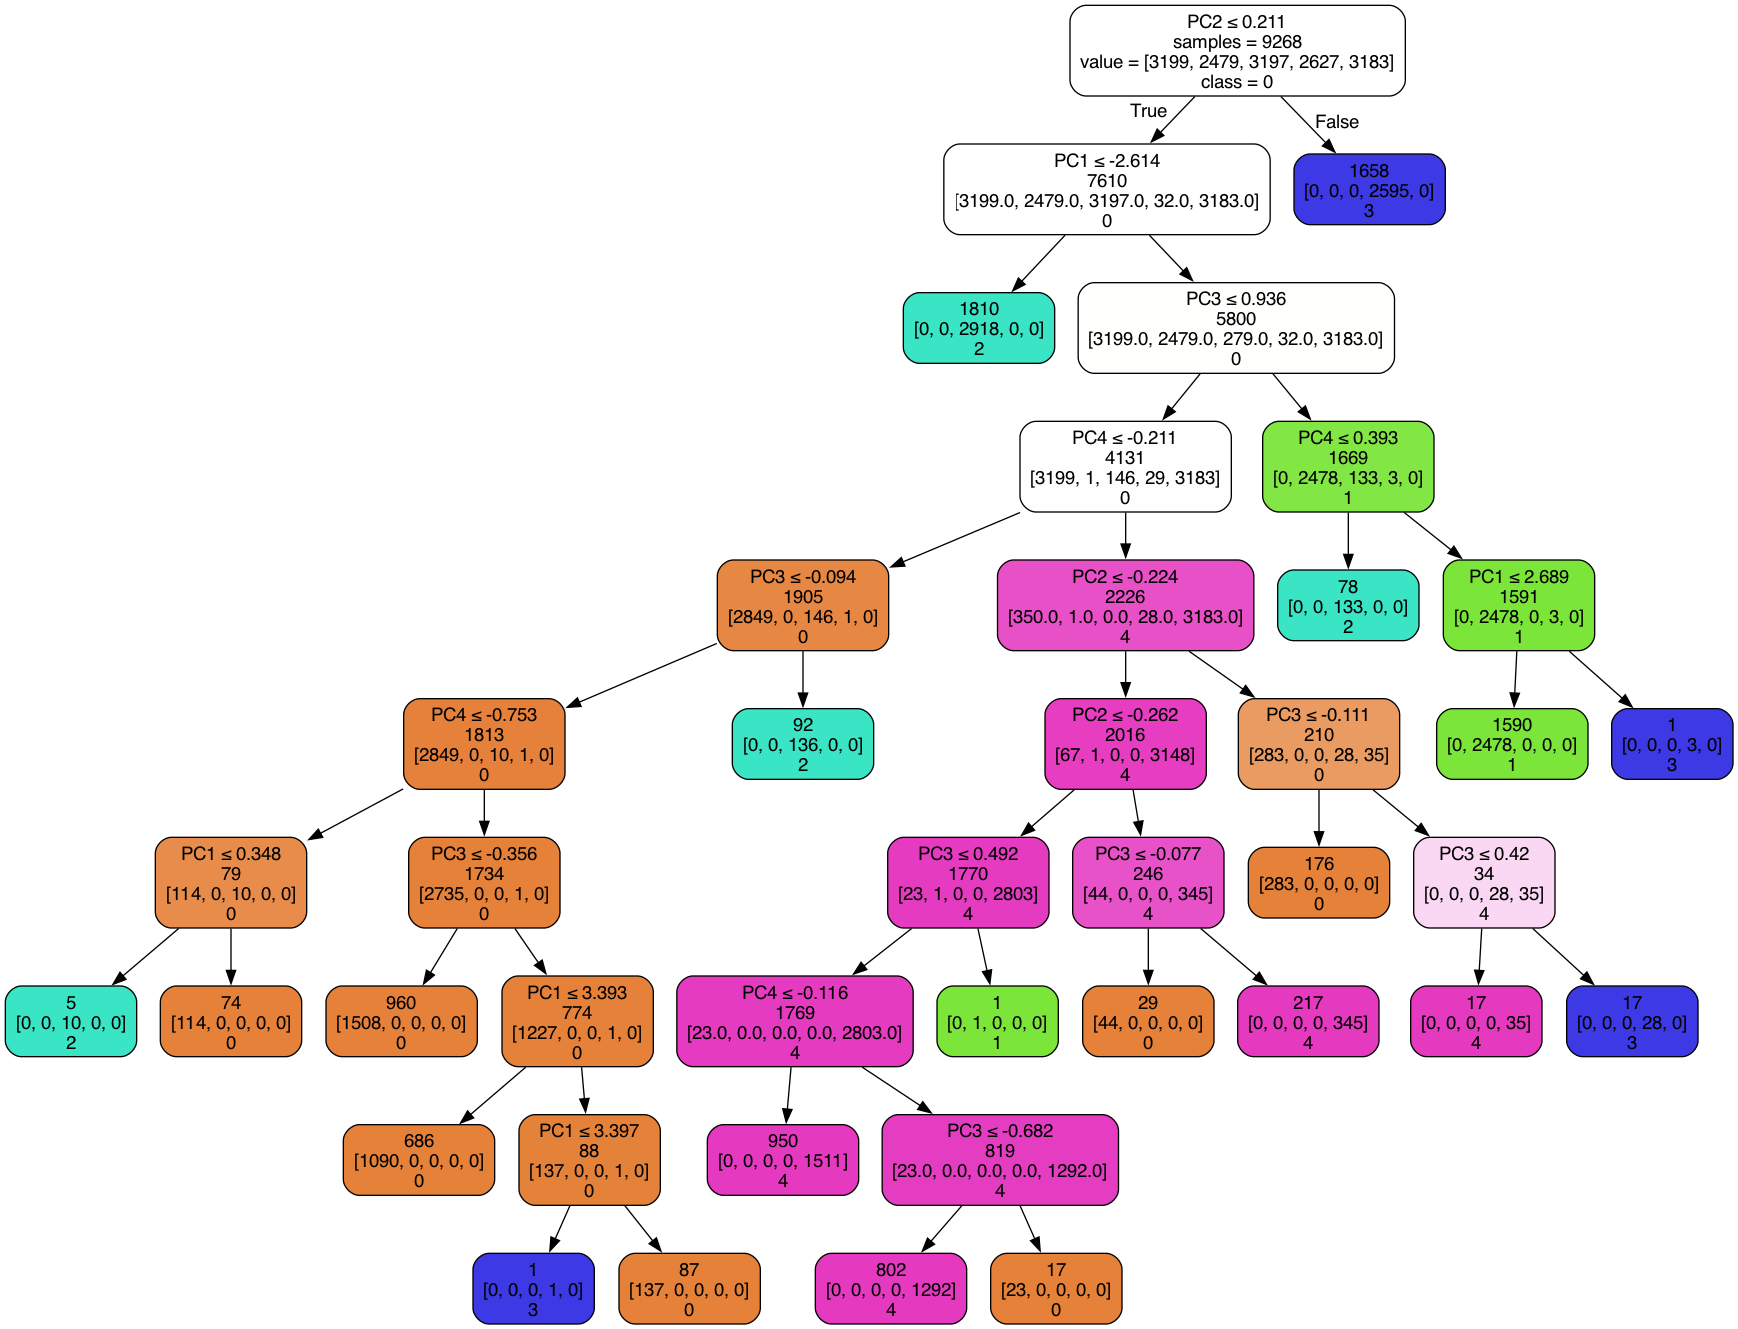

In [40]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import graphviz

class_names = list(map(str, set(y_train)))
df_X_train_pca = pd.DataFrame(X_train_pca)
tree = rf.estimators_[0]
dot_data = export_graphviz(
    tree,
    out_file=None, 
    feature_names=['PC1', 'PC2', 'PC3', 'PC4'],
    class_names=class_names,  # Use the list of class names
    filled=True,
    rounded=True,  
    special_characters=True,
    label='root',
    proportion=False,  # Set proportion to False
    impurity=False
)
graph = graphviz.Source(dot_data)
Image(graph.render(format='png'))


#### Testing the Random Forest model

#### Listing 9.22 Jupyter notebook code — Scale the features and apply PCA

In [41]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_pca = pca.transform(X_test_scaled)

#### Listing 9.23 Jupyter notebook code — Features reduction using PCA

In [42]:
y_pred = rf.predict(X_test_pca)

#### Listing 9.24 Jupyter notebook code — Evaluate the Random Forest model

In [43]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

f1 = f1_score(y_test, y_pred, average='macro')
print('F1 Score:', f1)

Accuracy: 1.0
F1 Score: 1.0


In [46]:
X_test_pca.shape

(3672, 4)

#### Listing 9.26 Jupyter notebook code — ML model Confusion Matrix

In [44]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[835   0   0   0   0]
 [  0 601   0   0   0]
 [  0   0 817   0   0]
 [  0   0   0 671   0]
 [  0   0   0   0 748]]


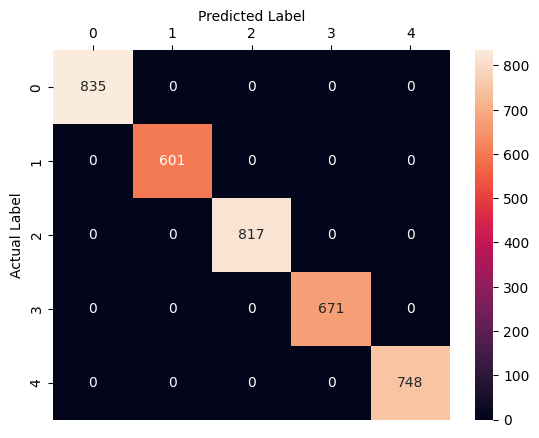

In [48]:
f, ax = plt.subplots()
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, fmt='g')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

## Generating the XGBoost model

### Listing 9.42 Jupyter notebook code — Train the XGBoost using X_train_pca

In [90]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
# Add silent=True to avoid printing out updates with each cycle
#xgb.fit(X_train_pca, y_train)
xgb.fit(X_train_pca, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## Testing the XGBoost model

#### Listing 9.43 Jupyter notebook code — Evaluate the XGBoost model

In [91]:
#y_pred = xgb.predict(X_test_pca).round()
y_pred = xgb.predict(X_test_pca)
#y_pred = y_pred.round().astype(int)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_pred, y_test)))

Mean Absolute Error : 0.0


In [92]:
y_pred

array([4, 4, 0, ..., 1, 0, 4])

In [93]:
# calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# calculate and print the F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 Score:', f1)

Accuracy: 1.0
F1 Score: 1.0


#### Listing 9.45 Jupyter notebook code — Generate the XGBoost ML model Confusion Matrix

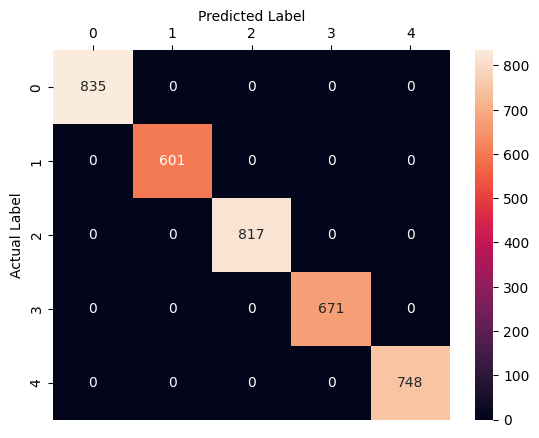

In [46]:
f, ax = plt.subplots()
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, fmt='g')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

## Answers to Exercise

#### Listing 9.47 Jupyter notebook code — Decision Tree with 1000 data points from df_orig

In [95]:
import pandas as pd
import re
import math
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



path_train = r"dtqbc-m-train.csv"
df_orig = pd.read_csv(path_train, usecols = ['label','qname', 'qd_qtype'])
df_orig.rename(columns={'qname': 'fqdn', 'qd_qtype':'query_type', 'label':'class'}, inplace=True)
df_orig = df_orig.drop_duplicates()
df_orig = df_orig.reset_index(drop=True)
df_orig = df_orig.sample(n = 1000)

df_orig['fqdn_length'] = df_orig['fqdn'].str.len()
df_orig['fqdn_count_numbers'] = df_orig['fqdn'].str.count('\d')
df_orig['fqdn_count_letters'] = df_orig['fqdn'].str.count('[a-zA-Z]')
df_orig['fqdn_count_special'] = df_orig['fqdn'].str.count('[^\d\w\s]')
df_orig['fqdn_count_lower'] = df_orig['fqdn'].str.count('[a-z]')
df_orig['fqdn_count_upper'] = df_orig['fqdn'].str.count('[A-Z]')
df_orig['fqdn_count_num_fqdn_labels'] = df_orig['fqdn'].str.count('\.')


def firstlength(string):
    return len(re.findall("[^.]+", string)[0])

def extract_labels(string):
    return re.findall("[^.]+", string)

def maxlength(list):
    return len(max(list, key=len))

def entropy(s):
    p, lns = Counter(s), float(len(s))
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

df_orig['first_fqdn_label_length'] = [firstlength(x) for x in df_orig['fqdn']]

df_orig['extracted_fqdn_labels'] = [extract_labels(x) for x in df_orig['fqdn']]

df_orig['max_fqdn_label_length'] = [maxlength(x) for x in df_orig['extracted_fqdn_labels']]

df_orig = df_orig.drop(['extracted_fqdn_labels'], axis='columns')

df_orig['fqdn_entropy'] = [entropy(x) for x in df_orig['fqdn']]

df_orig_selected = df_orig[['class', 'query_type', 'fqdn_length', 'fqdn_count_numbers', 'fqdn_count_letters', 'fqdn_count_special', 'fqdn_count_lower', 'fqdn_count_upper', 'fqdn_count_num_fqdn_labels', 'fqdn_entropy', 'first_fqdn_label_length','max_fqdn_label_length']]

X = df_orig_selected.drop('class', axis=1)
y = df_orig_selected['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

pca = PCA(n_components=4)
fit= pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train)


DecisionTreeClassifier()

#### Listing 9.48 Jupyter notebook code — 2.	Evaluate the Decision Tree model 

In [96]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_test_pca = pca.transform(X_test_scaled)

y_pred = dt.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

f1 = f1_score(y_test, y_pred, average='macro')
print('F1 Score:', f1)


Accuracy: 0.995
F1 Score: 0.9939044100669591


#### Listing 9.49 Jupyter notebook code — Confusion matrix

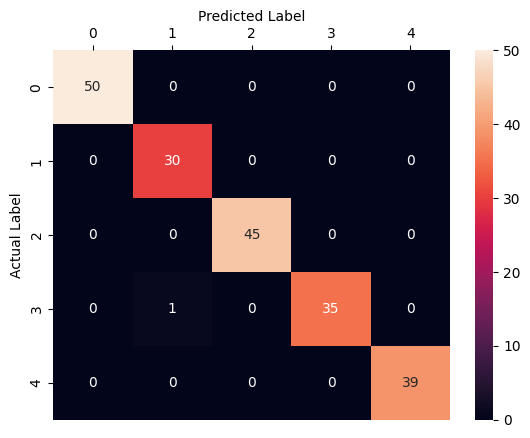

In [97]:
f, ax = plt.subplots()
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, fmt='g')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')